In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Umsätze

In [2]:
df = pd.read_excel('data/neueFische_Umsaetze_Baeckerei.xlsx')

In [3]:
df.describe()

,Branch,SoldTurnver
count,52895.00000,52892.000000
mean,2.00000,478.090163
std,0.81917,506.824089
min,1.00000,3.111802
25%,1.00000,163.216660
50%,2.00000,270.341768
75%,3.00000,546.429821
max,3.00000,3263.457675


In [4]:
df.head()

,Branch,Date,PredictionGroupName,SoldTurnver
0,1,2012-01-01,Mischbrote,134.735759
1,1,2012-01-01,Weizenbrötchen,150.104897
2,1,2012-01-01,klassischer Kuchen,322.635866
3,1,2012-01-01,handliches Gebäck,1047.327119
4,1,2012-01-01,herzhafter Snack,816.663466


In [78]:
df.groupby('Branch').PredictionGroupName.value_counts()#.sort_values(ascending=False)

Branch  PredictionGroupName
1       Weizenbrötchen         3550
        handliches Gebäck      3550
        herzhafter Snack       3550
        klassischer Kuchen     3550
        Mischbrote             3547
2       Weizenbrötchen         3481
        handliches Gebäck      3481
        klassischer Kuchen     3481
        herzhafter Snack       3480
        Mischbrote             3478
3       Weizenbrötchen         3550
        handliches Gebäck      3550
        herzhafter Snack       3550
        klassischer Kuchen     3550
        Mischbrote             3547
Name: PredictionGroupName, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52895 entries, 0 to 52894
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Branch               52895 non-null  int64         
 1   Date                 52895 non-null  datetime64[ns]
 2   PredictionGroupName  52895 non-null  object        
 3   SoldTurnver          52892 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='PredictionGroupName', ylabel='Branch'>

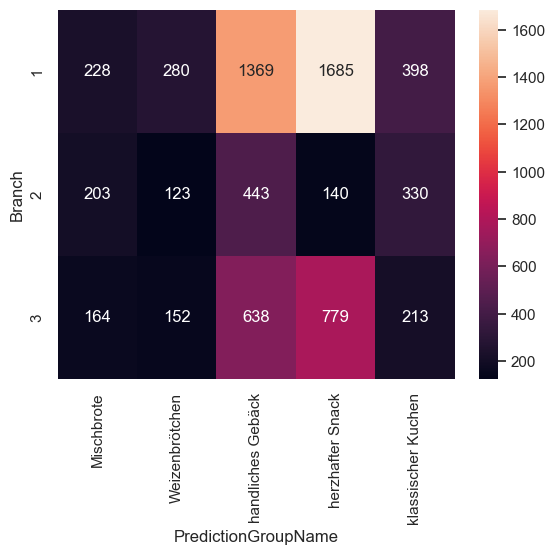

In [96]:
sns.heatmap(data=pd.crosstab(df['Branch'],df['PredictionGroupName'],values=df['SoldTurnver'], aggfunc='mean'),annot=True, fmt='.0f')

In [79]:
df.groupby('PredictionGroupName').SoldTurnver.describe()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [7]:
df.head()

,Branch,Date,PredictionGroupName,SoldTurnver
0,1,2012-01-01,Mischbrote,134.735759
1,1,2012-01-01,Weizenbrötchen,150.104897
2,1,2012-01-01,klassischer Kuchen,322.635866
3,1,2012-01-01,handliches Gebäck,1047.327119
4,1,2012-01-01,herzhafter Snack,816.663466


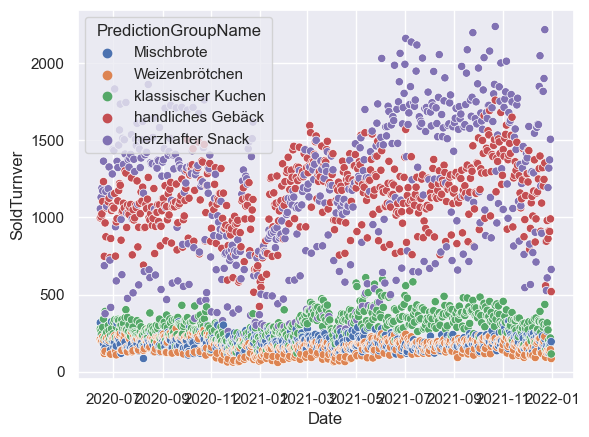

In [72]:
g = sns.scatterplot(data=df.loc[(df['Date']>'2020-05-01')&(df['Branch']==1)], x='Date', y='SoldTurnver', hue='PredictionGroupName')

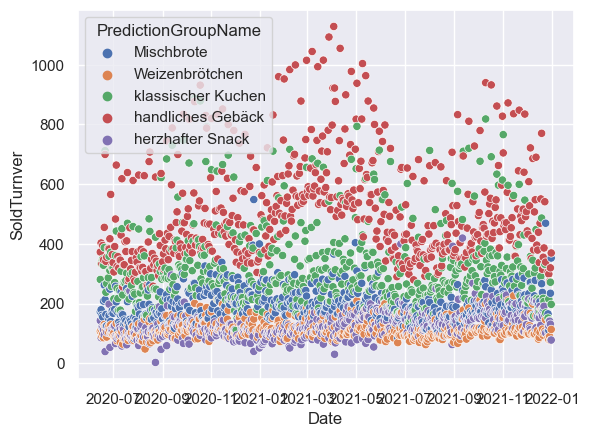

In [73]:
g = sns.scatterplot(data=df.loc[(df['Date']>'2020-05-01')&(df['Branch']==2)], x='Date', y='SoldTurnver', hue='PredictionGroupName')

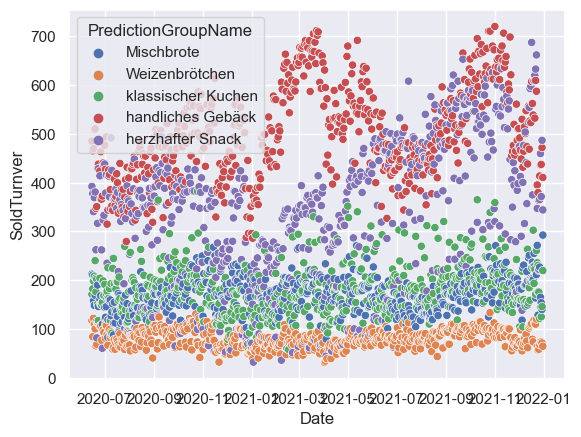

In [74]:
g = sns.scatterplot(data=df.loc[(df['Date']>'2020-05-01')&(df['Branch']==3)], x='Date', y='SoldTurnver', hue='PredictionGroupName')

# Wetter

In [31]:
wthr = pd.read_csv('data/neueFische_Wetter.csv')

In [44]:
wthr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        87672 non-null  object 
 1   temp        87672 non-null  float64
 2   feels_like  87672 non-null  float64
 3   pressure    87672 non-null  int64  
 4   humidity    87672 non-null  int64  
 5   clouds      87672 non-null  int64  
 6   visibility  84921 non-null  float64
 7   wind_speed  87672 non-null  float64
 8   wind_deg    87672 non-null  int64  
 9   wind_gust   30566 non-null  float64
 10  rain_1h     14258 non-null  float64
 11  snow_1h     1046 non-null   float64
 12  weather_id  87672 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 8.7+ MB


In [51]:
len(wthr.columns)

13

<AxesSubplot:ylabel='temp'>

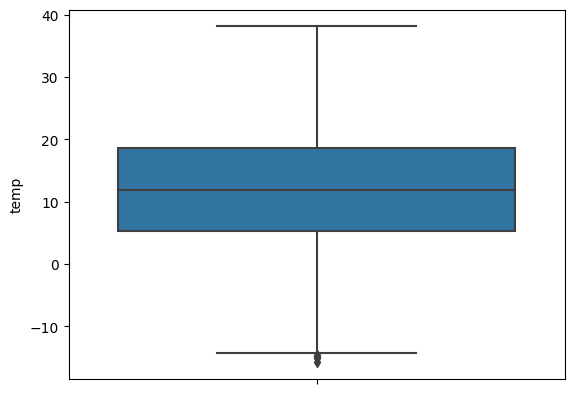

In [55]:
sns.boxplot(data=wthr, y='temp')

In [57]:
wthr.columns

Index(['time', 'temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h',
       'snow_1h', 'weather_id'],
      dtype='object')

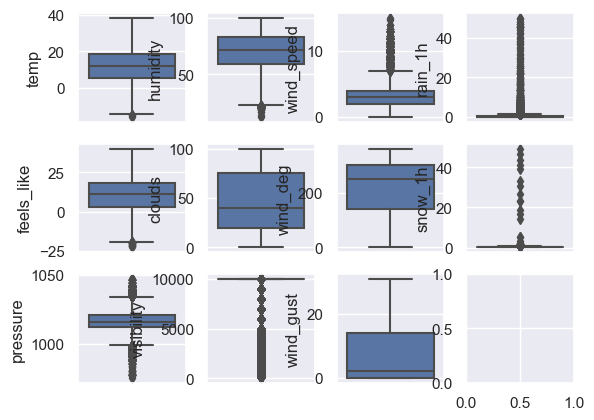

In [65]:
sns.set()
fig, axes = plt.subplots(3,4)
ax=int(0)
ay=int(0)
ay2=0
for e in ['temp', 'feels_like', 'pressure', 'humidity', 'clouds',
       'visibility', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h',
       'snow_1h']:  
       sns.boxplot(data=wthr, y=e, ax=axes[ay,ax])
       ax+=1
       ay2+=1
       ay=int(ay2%3)
       ax=int(ax-ay/4)

In [35]:
wthr.tail()

,time,temp,feels_like,pressure,humidity,clouds,visibility,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,weather_id
87667,2021-12-31 20:00:00 +01:00,13.15,12.48,1020,75,70,NaN,1.34,243,2.68,0.25,NaN,500
87668,2021-12-31 21:00:00 +01:00,13.79,13.08,1020,71,57,NaN,1.34,239,3.58,NaN,NaN,803
87669,2021-12-31 22:00:00 +01:00,14.38,13.68,1020,69,93,NaN,2.68,309,4.02,NaN,NaN,804
87670,2021-12-31 23:00:00 +01:00,14.58,13.87,1020,68,0,10000.0,3.13,208,4.02,1.52,NaN,501
87671,2022-01-01 00:00:00 +01:00,14.48,13.73,1021,67,0,10000.0,4.02,187,8.05,1.52,NaN,501


In [33]:
wthr.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,87672.0,12.155226,8.632749,-15.77,5.35,11.89,18.62,38.11
feels_like,87672.0,10.876790,9.774918,-22.77,3.18,11.03,18.29,40.04
pressure,87672.0,1016.465143,8.097692,975.00,1012.00,1016.00,1021.00,1047.00
humidity,87672.0,70.286066,16.109694,12.00,59.00,72.00,83.00,100.00
clouds,87672.0,42.673077,32.650085,0.00,20.00,40.00,75.00,100.00
visibility,84921.0,9296.869373,2045.574641,50.00,10000.00,10000.00,10000.00,10000.00
wind_speed,87672.0,3.132998,1.987412,0.00,2.00,3.00,4.00,15.00
wind_deg,87672.0,215.922290,97.071699,0.00,140.00,250.00,300.00,360.00
wind_gust,30566.0,6.116232,7.105029,0.00,0.00,2.24,14.00,31.00
rain_1h,14258.0,0.861530,2.704707,0.10,0.19,0.32,0.73,49.78


In [34]:
len(wthr.weather_id.unique())

40

<AxesSubplot:xlabel='time', ylabel='feels_like'>

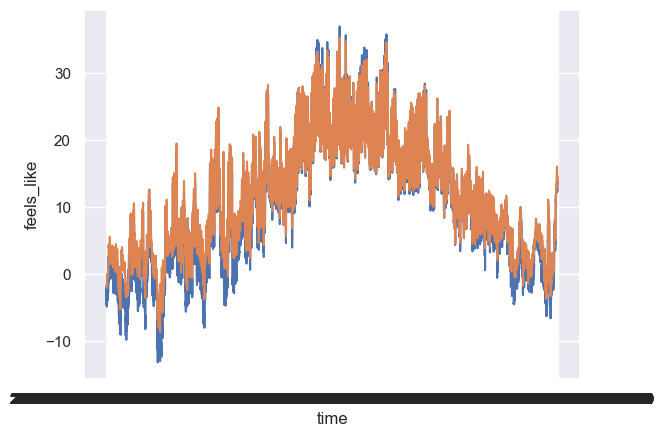

In [97]:
sns.lineplot(data=wthr.loc[(wthr['time']>'2021-01-01')], x='time', y='feels_like')
sns.lineplot(data=wthr.loc[(wthr['time']>'2021-01-01')], x='time', y='temp')